# Sport Vouchers Program Analysis

The goal of this Portfolio task is to explore data from the Federal Government Sport Vouchers program - this is a
program that provides up to two $100 vouchers for kids to participate in organised sport. Here's the [NSW Active Kids page](https://www.service.nsw.gov.au/transaction/apply-active-kids-voucher), there are similar schemes in other states - this data is from South Australia.

This is an exercise in exploring data and communicating the insights you can gain from it.  The source data comes
from the `data.gov.au` website and provides details of all Sport Vouchers that have been redeemed since February  in SA 2015 as part of the Sport Voucher program:  [Sports Vouchers Data](https://data.gov.au/dataset/ds-sa-14daba50-04ff-46c6-8468-9fa593b9f100/details).  This download is provided for you as `sportsvouchersclaimed.csv`.

To augment this data you can also make use of [ABS SEIFA data by LGA](http://stat.data.abs.gov.au/Index.aspx?DataSetCode=ABS_SEIFA_LGA#) which shows a few measures of Socioeconomic Advantage and Disadvantage for every Local Government Area. This data is provided for you as `ABS_SEIFA_LGA.csv`. This could enable you to answer questions about whether the voucher program is used equally by parents in low, middle and high socioeconomic areas.   You might be interested in this if you were concerned that this kind of program might just benifit parents who are already advantaged (they might already be paying for sport so this program wouldn't be helping much).

Questions:
* Describe the distribution of vouchers by: LGA, Sport - which regions/sports stand out? 
* Are some sports more popular in different parts of the state?
* Are any LGAs over/under represented in their use of vouchers?
* Is there a relationship between any of the SEIFA measures and voucher use in an LGA?

A challenge in this task is to display a useful summary of the data given that there are a large number of LGAs and sports involved.  Try to avoid long lists and large tables. Think about what plots and tables communicate the main points of your findings. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read the sports vouchers data
sa_vouchers = pd.read_csv("files/sportsvouchersclaimed.csv")
sa_vouchers.head()

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year
0,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,26/6/15 1:19,2015
1,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,29/6/16 23:55,2016
2,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,21/4/16 3:37,2016
3,1000004,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,30/3/17 0:47,2017
4,1000005,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Blackwood Community Recreation Association,Gymnastics,ONKAPARINGA,FISHER,20/7/15 2:50,2015


The SEIFA data includes row for each Local Government Area (LGA) but the names of the LGAs have a letter or letters in brackets after the name.  To allow us to match this up with the voucher data we remove this and convert to uppercase. 

For each LGA the data includes a number of measures all of which could be useful in your exploration.  

In [3]:
# read the SEIFA data, create an LGA column by removing the letters in brackets and converting to uppercase
seifa = pd.read_csv('files/ABS_SEIFA_LGA.csv')
lga = seifa["Local Government Areas - 2011"].str.replace(' \([ACSRCDMT]+\)', '').str.upper()
seifa['LGA'] = lga
seifa.head()

<ipython-input-3-8c32cb05a179>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  lga = seifa["Local Government Areas - 2011"].str.replace(' \([ACSRCDMT]+\)', '').str.upper()


,LGA_2011,Local Government Areas - 2011,INDEX_TYPE,Index Type,MEASURE,Measure,Value,LGA
0,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,967,ALBURY
1,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MINS,Minimum score for SA1s in area,628,ALBURY
2,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,MAXS,Maximum score for SA1s in area,1169,ALBURY
3,10050,Albury (C),IRSAD,Index of Relative Socio-economic Advantage and...,URP,Usual resident population,47851,ALBURY
4,10110,Armidale Dumaresq (A),IRSAD,Index of Relative Socio-economic Advantage and...,SCORE,Score,985,ARMIDALE DUMARESQ


Since there are many rows per LGA we need to use `pivot_table` to create a new data frame with one row per LGA. Here
is an example of doing this to create a table with the different SCORE measures and the population (URP) field. 

In [4]:
LGA_scores = seifa[seifa.MEASURE == 'SCORE'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_scores.head()
LGA_pop = seifa[seifa.MEASURE == 'URP'].pivot_table(index="LGA", columns=["INDEX_TYPE"], values="Value")
LGA_scores['Population'] = LGA_pop.IEO
LGA_scores.head()

INDEX_TYPE,IEO,IER,IRSAD,IRSD,Population
LGA,,,,,
ADELAIDE,874.0,874.0,1036.0,1013.0,19606.0
ADELAIDE HILLS,1083.0,1083.0,1077.0,1081.0,38601.0
ALBANY,999.0,999.0,977.0,987.0,33614.0
ALBURY,964.0,964.0,967.0,979.0,47851.0
ALEXANDRINA,1000.0,1000.0,969.0,987.0,23693.0


This data frame can then be joined with the vouchers data fram to create one master data frame containing both the voucher data and the SEIFA measures.

In [5]:
sa_vouchers_scores = sa_vouchers.join(LGA_scores, on='Participant_LGA')
sa_vouchers_scores.head()

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year,IEO,IER,IRSAD,IRSD,Population
0,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,26/6/15 1:19,2015,996.0,996.0,975.0,993.0,159517.0
1,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,29/6/16 23:55,2016,996.0,996.0,975.0,993.0,159517.0
2,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,21/4/16 3:37,2016,996.0,996.0,975.0,993.0,159517.0
3,1000004,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,30/3/17 0:47,2017,996.0,996.0,975.0,993.0,159517.0
4,1000005,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Blackwood Community Recreation Association,Gymnastics,ONKAPARINGA,FISHER,20/7/15 2:50,2015,996.0,996.0,975.0,993.0,159517.0


# Initial summary of the data LGA & sport distribution

In [187]:
print(len(sa_vouchers_scores), "vouchers given")
print(len(sa_vouchers_scores.Voucher_Sport.unique()), "unique sports")
print(len(sa_vouchers_scores.Participant_LGA.unique()), "LGA's")

127526 vouchers given
50 unique sports
69 LGA's


In [188]:
sport_data = sa_vouchers_scores.groupby(["Voucher_Sport"])

# Sports with very few vouchers

In [208]:
under_2_percent = sa_vouchers_scores.groupby("Voucher_Sport").filter(lambda x: len(x) <= 2550)
print(len(under_2_percent), "vouchers to sports with less then 2550 (2%) vouchers per sport across", 
      len(under_2_percent.groupby("Voucher_Sport").groups.keys()), "sports.")


under_2000 = sa_vouchers_scores.groupby("Voucher_Sport").filter(lambda x: len(x) <= 2000)
print(len(under_2000), "vouchers to sports with less then 2000 (1.56%) vouchers per sport across", 
      len(under_2000.groupby("Voucher_Sport").groups.keys()), "sports.")

under_1_percent = sa_vouchers_scores.groupby("Voucher_Sport").filter(lambda x: len(x) <= 1275)
print(len(under_1_percent),"vouchers to sports with less then 1275 (1%) vouchers per sport across",
      len(under_1_percent.groupby("Voucher_Sport").groups.keys()), "sports.")

13385 vouchers to sports with less then 2550 (2%) vouchers per sport across 42 sports.
10863 vouchers to sports with less then 2000 (1.56%) vouchers per sport across 41 sports.
7546 vouchers to sports with less then 1275 (1%) vouchers per sport across 39 sports.


# Selection of the cut off for very few vouchers

There appear to be many sports that have received less than 2000 (~1.57%) of the 127526 vouchers. Seeing as there are over 50 sports it is a better representation of the underlying data to filter these out and combine these sports as an amalgamated 'Other' category, seeing as they only represent a combined 8.52% of all vouchers given and doing this leaves us with 10 categories in total, a nice whole number.  

In [209]:
main_sports = sa_vouchers_scores.groupby("Voucher_Sport").filter(lambda x: len(x) > 2000)
other_sports = under_2000
main_sports.groupby("Voucher_Sport").size()

Voucher_Sport
Athletics             4518
Australian Rules     47224
Basketball            6016
Calisthenics          2522
Football (Soccer)    15775
Gymnastics            9823
Hockey                3026
Netball              24017
Tennis                3742
dtype: int64

# Creating the 'Other' category

In [210]:
correct_other_sports = other_sports.loc[other_sports["Voucher_Sport"] != "Other", "Voucher_Sport"] = "Other"

# Combining both main sports with the 'Other' category

In [211]:
combined_sports = pd.concat([main_sports, other_sports])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Australian Rules'),
  Text(1, 0, 'Gymnastics'),
  Text(2, 0, 'Basketball'),
  Text(3, 0, 'Netball'),
  Text(4, 0, 'Calisthenics'),
  Text(5, 0, 'Tennis'),
  Text(6, 0, 'Football (Soccer)'),
  Text(7, 0, 'Athletics'),
  Text(8, 0, 'Hockey'),
  Text(9, 0, 'Other')])

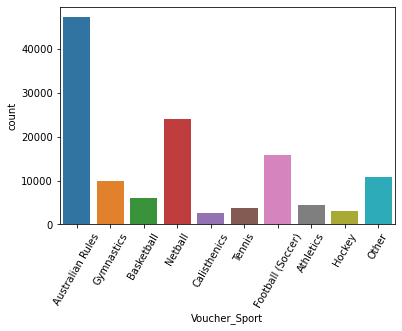

In [212]:
sns.countplot(x='Voucher_Sport', data=combined_sports)
plt.xticks(rotation=60)

# Description of sport distribution

## Dominant sports

It is quite clear from the graph that 3 sports dominate with 87016 (68%) of the total vouchers:

-Australian Rules [47224 (37.03%)]

-Netball [24017 (18.83%)]

-Soccer [15775 (12.37%)]



## Mid-tier sports

There are 6 other sports that receive greater than 2000 (1.56%) of the vouchers which they combine for a total of 29647 (23.25%):

-Gymnastics

-Basketball

-Calisthenics

-Tennis

-Athletics

-Hockey

## Sports with very few vouchers

Lastly a total of 41 sports share 10863 (8.52%) of the vouchers

## Overall description of sports

The data for sports is very lop-sided, 3 major sports have an oligopoly on the vouchers (68%) with one of them, Australian rules, being the standout amonugst those 3 possesing 37% of the total vouchers. A further 6 sports fill out the middle (23%) while most of the sports, 41 in total, share the remaining 9%. 

# LGA's with very few vouchers

In [213]:
LGA_data = sa_vouchers_scores.groupby(["Participant_LGA"])

In [219]:
LGA_under_2_percent = sa_vouchers_scores.groupby("Participant_LGA").filter(lambda x: len(x) <= 2550)
print(len(LGA_under_2_percent), "vouchers to LGA's with less then 2550 (2%) vouchers per LGA across", 
      len(LGA_under_2_percent.groupby("Participant_LGA").groups.keys()), "LGA's.")

LGA_under_2200 = sa_vouchers_scores.groupby("Participant_LGA").filter(lambda x: len(x) <= 2200)
print(len(LGA_under_2200), "vouchers to LGA's with less then 2200 (1.73%) vouchers per LGA across", 
      len(LGA_under_2200.groupby("Participant_LGA").groups.keys()), "LGA's.")

LGA_under_2000 = sa_vouchers_scores.groupby("Participant_LGA").filter(lambda x: len(x) <= 2000)
print(len(LGA_under_2000), "vouchers to LGA's with less then 2000 (1.56%) vouchers per LGA across", 
      len(LGA_under_2000.groupby("Participant_LGA").groups.keys()), "LGA's.")

LGA_under_1_percent = sa_vouchers_scores.groupby("Participant_LGA").filter(lambda x: len(x) <= 1275)
print(len(LGA_under_1_percent),"vouchers to LGA's with less then 1275 (1%) vouchers per LGA across",
      len(LGA_under_1_percent.groupby("Participant_LGA").groups.keys()), "LGA's.")

46422 vouchers to LGA's with less then 2550 (2%) vouchers per LGA across 54 LGA's.
37240 vouchers to LGA's with less then 2200 (1.73%) vouchers per LGA across 50 LGA's.
33049 vouchers to LGA's with less then 2000 (1.56%) vouchers per LGA across 48 LGA's.
19411 vouchers to LGA's with less then 1275 (1%) vouchers per LGA across 39 LGA's.


# Selection of cut for small LGA's

In [221]:
main_LGAs = sa_vouchers_scores.groupby("Participant_LGA").filter(lambda x: len(x) > 2200)
other_LGAs = LGA_under_2200
main_LGAs.groupby("Participant_LGA").size()

Participant_LGA
ADELAIDE HILLS            4756
ALEXANDRINA               2979
BAROSSA                   2874
BURNSIDE                  2213
CAMPBELLTOWN              2567
CHARLES STURT             6897
HOLDFAST BAY              2215
MARION                    5291
MITCHAM                   4662
MOUNT BARKER              3469
MOUNT GAMBIER             3271
ONKAPARINGA              12782
PLAYFORD                  6940
PORT ADELAIDE ENFIELD     6384
SALISBURY                 8169
TEA TREE GULLY            7219
UNLEY                     2266
WEST TORRENS              2844
WHYALLA                   2488
dtype: int64

# Creating 'Other' LGA category 

In [222]:
correct_other_LGAs = other_LGAs.loc[other_LGAs["Participant_LGA"] != "Other", "Participant_LGA"] = "Other"

In [223]:
combined_LGAs = pd.concat([main_LGAs, other_LGAs])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'ONKAPARINGA'),
  Text(1, 0, 'CHARLES STURT'),
  Text(2, 0, 'PORT ADELAIDE ENFIELD'),
  Text(3, 0, 'ADELAIDE HILLS'),
  Text(4, 0, 'BAROSSA'),
  Text(5, 0, 'PLAYFORD'),
  Text(6, 0, 'ALEXANDRINA'),
  Text(7, 0, 'MARION'),
  Text(8, 0, 'WEST TORRENS'),
  Text(9, 0, 'CAMPBELLTOWN'),
  Text(10, 0, 'BURNSIDE'),
  Text(11, 0, 'TEA TREE GULLY'),
  Text(12, 0, 'MITCHAM'),
  Text(13, 0, 'UNLEY'),
  Text(14, 0, 'MOUNT BARKER'),
  Text(15, 0, 'SALISBURY'),
  Text(16, 0, 'HOLDFAST BAY'),
  Text(17, 0, 'MOUNT GAMBIER'),
  Text(18, 0, 'WHYALLA'),
  Text(19, 0, 'Other')])

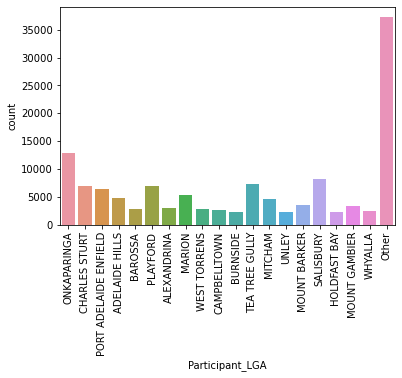

In [225]:
sns.countplot(x='Participant_LGA', data=combined_LGAs)
plt.xticks(rotation=90)

# Description of the LGA distribution

The data seems very homogenous. The 50 LGA's that have less then 2200 (1.73%) vouchers combine to a total of 37240 (29.20%) vouchers. The remaining 19 LGA's share 90286 (70.80%) of the vouchers but no single LGA seems to dominate possession of all the vouchers, the LGA with the largest share Onkaparinga had only 12782 (10.02%).

## Challenge - Queensland

_Note: this is an extra task that you might take on to get a better grade for your portfolio.  You can get a good pass grade without doing this._ 

Queensland has a similar program called [Get Started](https://data.gov.au/dataset/ds-qld-3118838a-d425-48fa-bfc9-bc615ddae44e/details?q=get%20started%20vouchers) and we can retrieve data from their program in a similar format.  

The file [round1-redeemed_get_started_vouchers.csv](files/round1-redeemed_get_started_vouchers.csv) contains records of the vouchers issued in Queensland. The date of this data is not included but the program started in 2015 so it is probably from around then.  

The data includes the LGA of the individual but the name of the activity is slightly different.  To do a comparable analysis you would need to map the activity names onto those from South Australia. 

In [ ]:
qld_vouchers = pd.read_csv('files/round1-redeemed_get_started_vouchers.csv')
qld_vouchers.head()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Australian Rules'),
  Text(1, 0, 'Gymnastics'),
  Text(2, 0, 'Basketball'),
  Text(3, 0, 'Netball'),
  Text(4, 0, 'Calisthenics'),
  Text(5, 0, 'Tennis'),
  Text(6, 0, 'Football (Soccer)'),
  Text(7, 0, 'Athletics'),
  Text(8, 0, 'Hockey')])

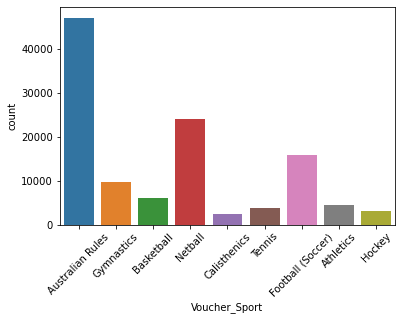

In [112]:
sns.countplot(x='Voucher_Sport', data=main_sports)
plt.xticks(rotation=45)

In [ ]:
# Join the QLD data with the LGA data as before to get population and SIEFA data integrated
qld_vouchers['LGA'] = qld_vouchers['Club Local Government Area Name'].str.replace(' \([RC]+\)', '').str.upper()
qld_vouchers_scores = qld_vouchers.join(LGA_scores, on='LGA')
qld_vouchers_scores.head()